# Visualisation des données ECMWF

## Prise en main

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '../Data/ECMWF/ECMWF_Monaco_20180501.nc'

### Metadata

In [3]:
ds = nc.Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2022-01-17 07:43:46 GMT by grib_to_netcdf-2.24.0: grib_to_netcdf /data/scratch/20220117-0730/5d/_mars-webmars-private-svc-green-001-6fe5cac1a363ec1525f54343b6cc9fd8-H5Y3be.grib -o /data/scratch/20220117-0740/33/_grib2netcdf-webmars-private-svc-green-010-6fe5cac1a363ec1525f54343b6cc9fd8-cahvIL.nc -utime
    dimensions(sizes): longitude(33), latitude(33), time(25)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 shww(time, latitude, longitude), int16 mpww(time, latitude, longitude), int16 wind(time, latitude, longitude), int16 dwi(time, latitude, longitude), float64 ssrd(time, latitude, longitude), float64 t2m(time, latitude, longitude)
    groups: 


In [4]:
d = ds.__dict__
print(d)

{'Conventions': 'CF-1.6', 'history': '2022-01-17 07:43:46 GMT by grib_to_netcdf-2.24.0: grib_to_netcdf /data/scratch/20220117-0730/5d/_mars-webmars-private-svc-green-001-6fe5cac1a363ec1525f54343b6cc9fd8-H5Y3be.grib -o /data/scratch/20220117-0740/33/_grib2netcdf-webmars-private-svc-green-010-6fe5cac1a363ec1525f54343b6cc9fd8-cahvIL.nc -utime'}


### Dimensions

In [5]:
print(ds.dimensions)

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 33, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 33, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 25}


In [6]:
for v in ds.dimensions.values():
    print(v, end=' <-- ')
    print(v.name)

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 33 <-- longitude
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 33 <-- latitude
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 25 <-- time


### Variables

In [7]:
print(list(ds.variables.values())[0])

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (33,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [8]:
print(list(ds.variables.values())[1])

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (33,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [9]:
for v in ds.variables.values():
    totalLen = 80
    dim = v.dimensions
    if len(dim) == 1 and dim[0] == v.name:
        typestr = f'[arg of shape {ds[v.name][:].size}]'
        spaces = ' '*(totalLen - len(typestr) - len(v.name))
        print(v.name + spaces + typestr)
    else:
        valuestr = f'{v.name} {dim}'
        spaces = ' '*(totalLen - 7 - len(valuestr))
        print(valuestr + spaces + '[value]')
print(totalLen*'_')
print('time       : Hours since 01/01/1900')
print('longitude  : Degrees East')
print('latitude   : Degrees North')
print('shww       : Signficant height of wind waves')
print('mpww       : Mean period of wind waves')
print('wind       : 10m wind speed')
print('dwi        : 10m wind direction')

longitude                                                      [arg of shape 33]
latitude                                                       [arg of shape 33]
time                                                           [arg of shape 25]
shww ('time', 'latitude', 'longitude')                                   [value]
mpww ('time', 'latitude', 'longitude')                                   [value]
wind ('time', 'latitude', 'longitude')                                   [value]
dwi ('time', 'latitude', 'longitude')                                    [value]
ssrd ('time', 'latitude', 'longitude')                                   [value]
t2m ('time', 'latitude', 'longitude')                                    [value]
________________________________________________________________________________
time       : Hours since 01/01/1900
longitude  : Degrees East
latitude   : Degress North
shww       : Signficant height of wind waves
mpww       : Mean period of wind waves
wind       : 10m 

In [29]:
ds['latitude'][:]

masked_array(data=[46.   , 45.875, 45.75 , 45.625, 45.5  , 45.375, 45.25 ,
                   45.125, 45.   , 44.875, 44.75 , 44.625, 44.5  , 44.375,
                   44.25 , 44.125, 44.   , 43.875, 43.75 , 43.625, 43.5  ,
                   43.375, 43.25 , 43.125, 43.   , 42.875, 42.75 , 42.625,
                   42.5  , 42.375, 42.25 , 42.125, 42.   ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [30]:
ds['longitude'][:]

masked_array(data=[5.5  , 5.625, 5.75 , 5.875, 6.   , 6.125, 6.25 , 6.375,
                   6.5  , 6.625, 6.75 , 6.875, 7.   , 7.125, 7.25 , 7.375,
                   7.5  , 7.625, 7.75 , 7.875, 8.   , 8.125, 8.25 , 8.375,
                   8.5  , 8.625, 8.75 , 8.875, 9.   , 9.125, 9.25 , 9.375,
                   9.5  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

### Data values

In [10]:
print(type(ds['wind'][:]))
print(ds['wind'][:].shape)

<class 'numpy.ma.core.MaskedArray'>
(25, 33, 33)


In [11]:
ds['wind'][0, 16:21, 16:21]

masked_array(
  data=[[--, --, --, --, --],
        [--, --, --, --, 3.28227234096276],
        [1.5078243618673044, 4.17194407004391, 6.268514571737713,
         6.268514571737713, 7.615260863026548],
        [6.797389493592446, 7.167487711045867, 7.220195702332222,
         7.219216606518853, 7.219216606518853],
        [6.54739369591227, 6.54739369591227, 6.787598535458758,
         7.12799751323999, 7.12799751323999]],
  mask=[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],
  fill_value=-32767)

In [12]:
wind = ds['wind'][0, :, :]
windData = wind.data
windData[wind.mask] = np.nan
print(windData[16:21, 16:21])

[[       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan 3.28227234]
 [1.50782436 4.17194407 6.26851457 6.26851457 7.61526086]
 [6.79738949 7.16748771 7.2201957  7.21921661 7.21921661]
 [6.5473937  6.5473937  6.78759854 7.12799751 7.12799751]]


## Mise en forme

In [13]:
def reprStrTuple(t):
    res = '('
    l = len(t)
    for k, s in enumerate(t):
        res += s
        if k < l - 1:
            res += ', '
        else:
            res += ')'
    return res

In [14]:
class GeoTimeSeries:

    def __init__(self, path):
        ds = nc.Dataset(path)
        self.arg = {}
        self.values = {}
        for v in ds.variables.values():
            dim = v.dimensions
            name = v.name
            if len(dim) == 1 and dim[0] == v.name:
                self.arg[name] = ds[name][:].size
            else:
                self.values[name] = dim
        self.dataset = ds

    def __repr__(self):
        res = ''
        totalLen = 80
        for key, value in self.arg.items():
            typestr = f'[arg of shape {value}]'
            spaces = ' '*(totalLen - len(typestr) - len(key))
            res += key + spaces + typestr + '\n'
        res += "="*totalLen + '\n'
        for key, value in self.values.items():
            valuestr = key + ' ' + reprStrTuple(dim)
            spaces = ' '*(totalLen - 7 - len(valuestr))
            res += valuestr + spaces + '[value]' + '\n'        
        return res

    def geoLoc(self):
        monacoLoc = (43 + 43/60 + 50/3600, 7 + 25/60 + 31/3600)
        long = self.dataset['longitude'][:].data
        lat = self.dataset['latitude'][:].data
        geoTab = np.meshgrid(lat, long)
        plt.figure()
        plt.scatter(geoTab[1].flat, geoTab[0].flat, s=3, c='tab:red', label='Measurements')
        plt.scatter([monacoLoc[1]], [monacoLoc[0]], marker='+', c='tab:blue', s=40, label='Monaco')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()

longitude                                                      [arg of shape 33]
latitude                                                       [arg of shape 33]
time                                                           [arg of shape 25]
shww (time, latitude, longitude)                                         [value]
mpww (time, latitude, longitude)                                         [value]
wind (time, latitude, longitude)                                         [value]
dwi (time, latitude, longitude)                                          [value]
ssrd (time, latitude, longitude)                                         [value]
t2m (time, latitude, longitude)                                          [value]



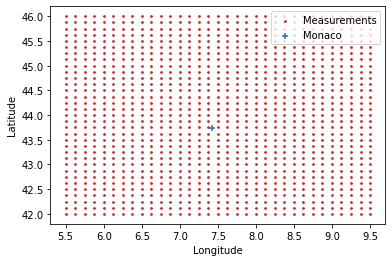

In [15]:
# Test

instance = GeoTimeSeries('../Data/ECMWF/ECMWF_Monaco_20180501.nc')
print(instance)
instance.geoLoc()

### Représentation en séries temporelles

In [16]:
class TimeSeries(GeoTimeSeries):

    def __init__(self, path):
        super().__init__(path)
        dfs = []
        t = self.dataset['time'][:]
        lo = self.dataset['longitude'][:]
        la = self.dataset['latitude'][:]
        for name in self.values.keys():
            header = [f'{name}:lat_{i}:long_{j}' for i in la[::-1] for j in lo]
            df = pd.DataFrame(
                data=self.dataset[name][:, ::-1, :].reshape(t.size, lo.size*la.size),
                index=t.data,
                columns=header)
            dfs.append(df)
        self.df = pd.concat(dfs, axis=1)

    def plotSeries(self, featName, lat, long):
        assert 42 <= lat <= 46 and 5.5 <= long <= 9.5
        la = .125*np.round(lat/.125)
        lo = .125*np.round(long/.125)
        plt.plot(self.df.index, self.df[featName + f':lat_{la}:long_{lo}'])
        plt.xlabel('Time')
        plt.ylabel(featName)

In [17]:
instance = TimeSeries('../Data/ECMWF/ECMWF_Monaco_20200502.nc')
instance.df

,shww:lat_42.0:long_5.5,shww:lat_42.0:long_5.625,shww:lat_42.0:long_5.75,shww:lat_42.0:long_5.875,shww:lat_42.0:long_6.0,shww:lat_42.0:long_6.125,shww:lat_42.0:long_6.25,shww:lat_42.0:long_6.375,shww:lat_42.0:long_6.5,shww:lat_42.0:long_6.625,...,dwi:lat_46.0:long_8.375,dwi:lat_46.0:long_8.5,dwi:lat_46.0:long_8.625,dwi:lat_46.0:long_8.75,dwi:lat_46.0:long_8.875,dwi:lat_46.0:long_9.0,dwi:lat_46.0:long_9.125,dwi:lat_46.0:long_9.25,dwi:lat_46.0:long_9.375,dwi:lat_46.0:long_9.5
1054824,1.377320,1.414155,1.464202,1.487825,1.485304,1.475920,1.462288,1.445014,1.426713,1.412194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054825,1.674661,1.638199,1.581616,1.498516,1.430728,1.389785,1.379514,1.408739,1.422465,1.452577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054826,1.814624,1.781104,1.727416,1.646696,1.537779,1.446742,1.385537,1.372838,1.402390,1.433063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054827,1.865418,1.875362,1.872748,1.836473,1.748237,1.657294,1.572746,1.502951,1.483390,1.506593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054828,1.904681,1.895764,1.879517,1.865885,1.823775,1.766118,1.703139,1.658134,1.634745,1.625874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054829,2.254076,2.239744,2.215561,2.181480,2.051041,1.957716,1.907902,1.874522,1.863784,1.865792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054830,2.288157,2.293339,2.269669,2.169669,2.128492,2.099920,2.078678,2.067240,2.051134,2.042497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054831,2.132507,2.094925,2.079425,2.072703,2.059304,2.057483,2.070182,2.100481,2.120789,2.132460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054832,1.967100,1.932132,1.888855,1.867566,1.881758,1.903327,1.932319,1.980125,2.017147,2.058884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054833,1.743055,1.717051,1.693102,1.666304,1.699171,1.754353,1.819340,1.873402,1.903280,1.924616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualisation des séries temporelles (au point le plus proche de Monaco)

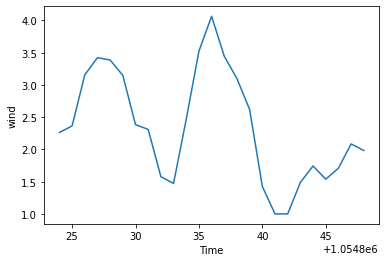

In [18]:
instance.plotSeries('wind', 43.73, 7.43)

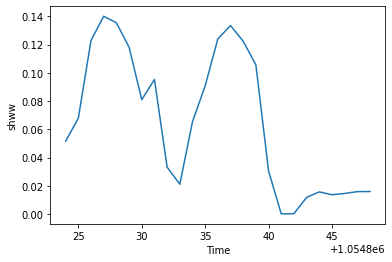

In [19]:
instance.plotSeries('shww', 43.73, 7.43)

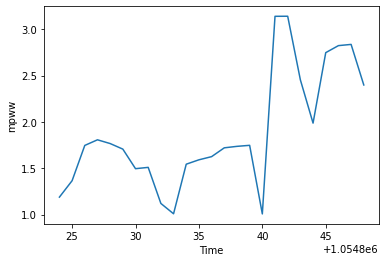

In [20]:
instance.plotSeries('mpww', 43.73, 7.43)

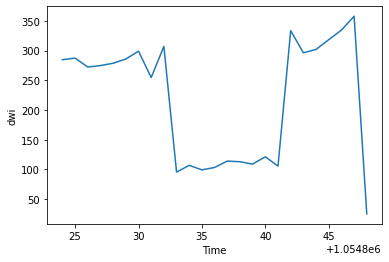

In [21]:
instance.plotSeries('dwi', 43.73, 7.43)

### Représentation géographique

In [22]:
class GeoSeries(GeoTimeSeries):

    def __init__(self, path):
        super().__init__(path)

    def plotFeature(self, featName, t):
        lat = self.dataset['latitude'][:]
        long = self.dataset['longitude'][:]
        X, Y = np.meshgrid(long, lat)
        Z = self.dataset[featName][t, :, :]
        plt.pcolor(X, Y, Z, shading='auto')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.colorbar()
        monacoLoc = (43 + 43/60 + 50/3600, 7 + 25/60 + 31/3600)
        plt.scatter([monacoLoc[1]], [monacoLoc[0]], c='tab:red', label='Monaco')
        plt.legend()


Text(0.5, 1.0, 'Zone correspondante')

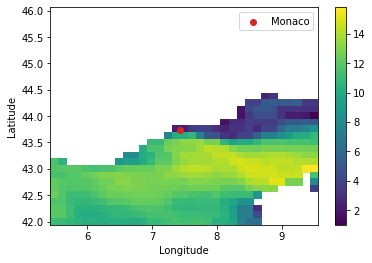

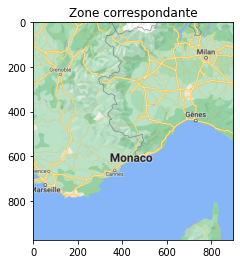

In [23]:
instance = GeoSeries('../Data/ECMWF/ECMWF_Monaco_20200502.nc')
instance.plotFeature('wind', 0)
plt.figure()
plt.imshow(plt.imread('./area.png'))
plt.title('Zone correspondante')

### Visualisation des cartes en fonction du temps

In [24]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [25]:
interact(
    instance.plotFeature,
    featName=fixed('wind'),
    t=widgets.IntSlider(min=0, max=24, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [26]:
interact(
    instance.plotFeature,
    featName=fixed('shww'),
    t=widgets.IntSlider(min=0, max=24, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [27]:
interact(
    instance.plotFeature,
    featName=fixed('mpww'),
    t=widgets.IntSlider(min=0, max=24, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [28]:
interact(
    instance.plotFeature,
    featName=fixed('dwi'),
    t=widgets.IntSlider(min=0, max=24, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>